In [9]:
# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/auto_examples/classification/
#   plot_classifier_comparison.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB.score
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LogisticRegression.html
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#  sklearn.model_selection.KFold.html

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [10]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [11]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd

In [12]:
# initial work with the smaller data set
bank = pd.read_csv('bank.csv', sep = ';')  # start with smaller data set
# examine the shape of original input data
print(bank.shape)

(4521, 17)


In [13]:
# drop observations with missing data, if any
bank.dropna()
# examine the shape of input data after dropping missing data
print(bank.shape)

(4521, 17)


In [14]:
# look at the list of column names, note that y is the response
list(bank.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [15]:
# look at the beginning of the DataFrame
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [16]:
# the rest of the program should set up the modeling methods
# and evaluation within a cross-validation design

# Start of exploratory code


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

In [18]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object

In [24]:
#Looking at the counts of binary columns
binary = ['response', 'default', 'housing', 'loan']
for col in binary:
    print('-----------------------------')
    print('         Value counts: ')
    print('-----------------------------')
    print(bank[col].value_counts())

-----------------------------
         Value counts: 
-----------------------------
no     4000
yes     521
Name: response, dtype: int64
-----------------------------
         Value counts: 
-----------------------------
no     4445
yes      76
Name: default, dtype: int64
-----------------------------
         Value counts: 
-----------------------------
yes    2559
no     1962
Name: housing, dtype: int64
-----------------------------
         Value counts: 
-----------------------------
no     3830
yes     691
Name: loan, dtype: int64


In [25]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

<Figure size 720x720 with 0 Axes>

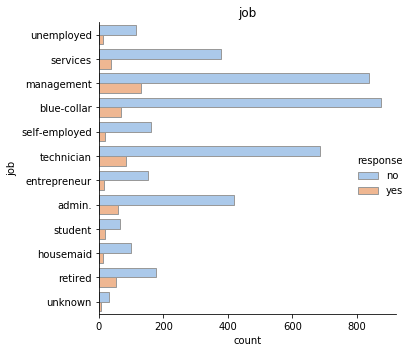

<Figure size 720x720 with 0 Axes>

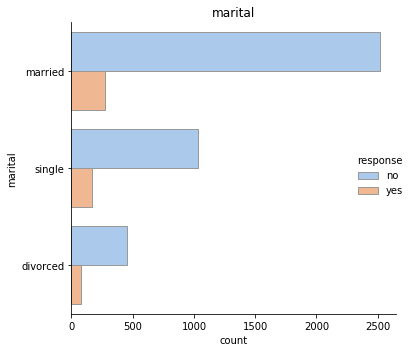

<Figure size 720x720 with 0 Axes>

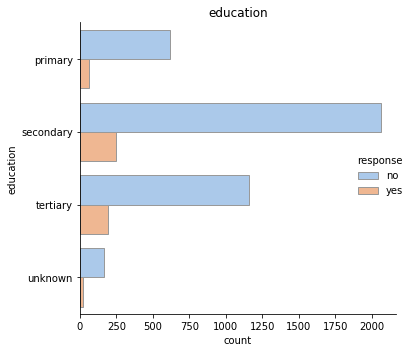

<Figure size 720x720 with 0 Axes>

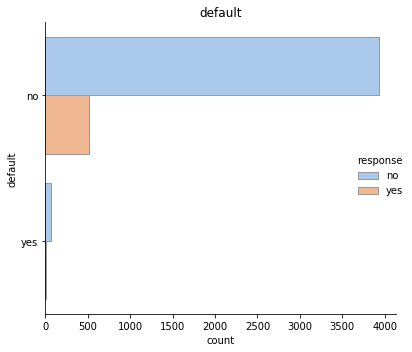

<Figure size 720x720 with 0 Axes>

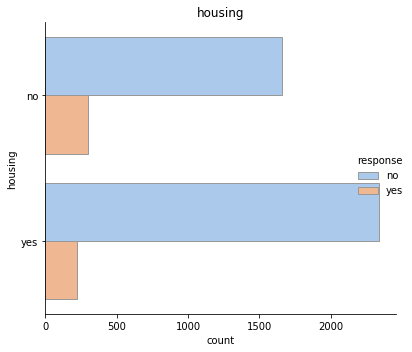

<Figure size 720x720 with 0 Axes>

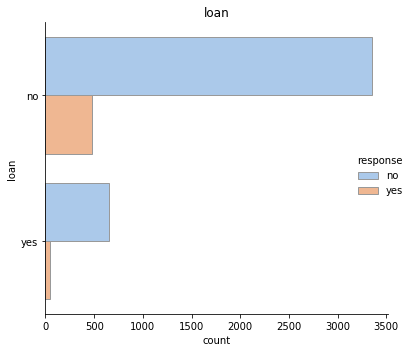

<Figure size 720x720 with 0 Axes>

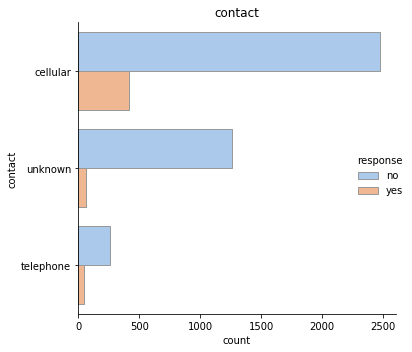

<Figure size 720x720 with 0 Axes>

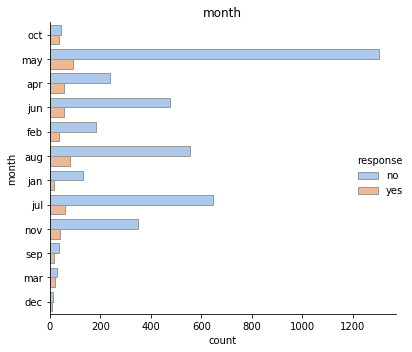

<Figure size 720x720 with 0 Axes>

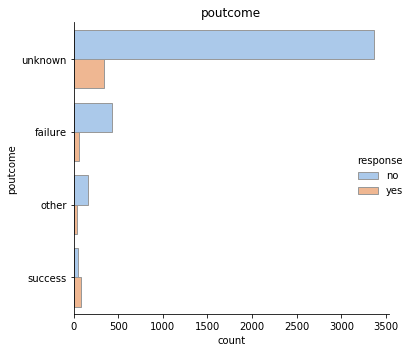

In [26]:
cat = ['job','marital','education','default','housing','loan','contact','month','poutcome']

for col in cat:
    plt.figure(figsize=(10,10))
    g = sns.catplot(y=col, hue="response", kind='count', palette="pastel", edgecolor="0.6", data=bank)
    plt.title(col)
    plt.tight_layout()

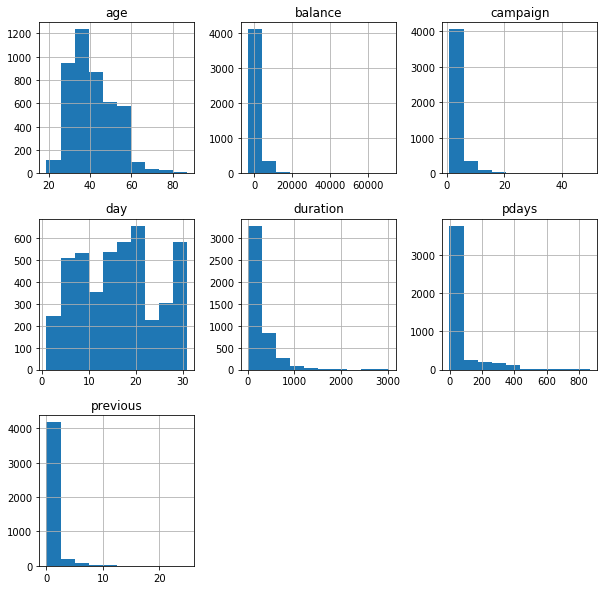

In [27]:
non_bin = ['age','balance','day','duration','campaign','pdays','previous']

hists = bank[non_bin].hist(bins = 10, figsize=(10,10), layout = (3,3))

-----------------------------------------
                 age


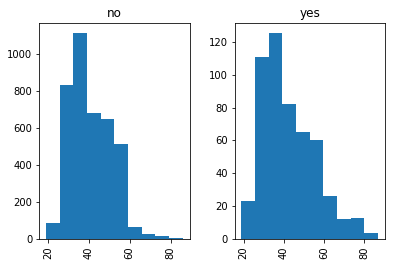

-----------------------------------------
                 balance


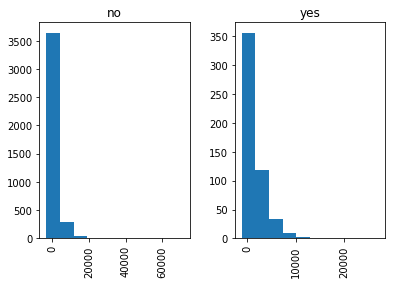

-----------------------------------------
                 day


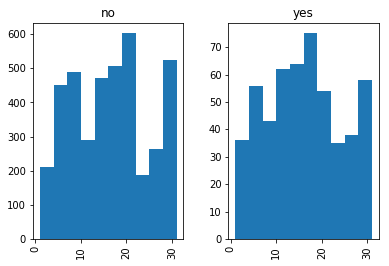

-----------------------------------------
                 duration


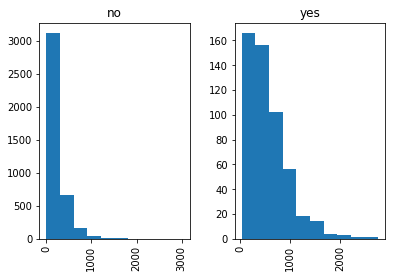

-----------------------------------------
                 campaign


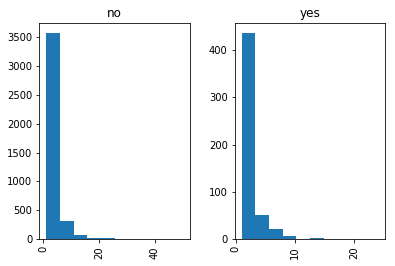

-----------------------------------------
                 pdays


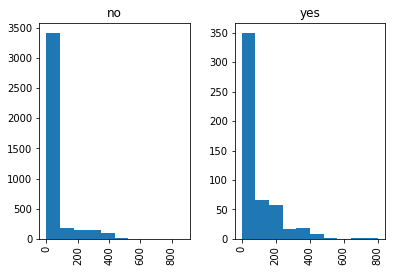

-----------------------------------------
                 previous


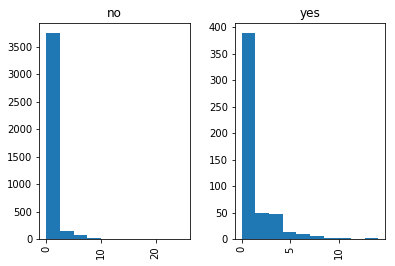

In [28]:
for col in non_bin:
    print('-----------------------------------------')
    bank[col].hist(by=bank['response'])
    print('                ',col)
    plt.show()

In [29]:
#lets explore Pdays more
bank['pdays'].head(25)

print(pd.crosstab(bank.pdays, bank.poutcome))

poutcome  failure  other  success  unknown
pdays                                     
-1              0      0        0     3705
 1              0      0        2        0
 2              0      7        0        0
 3              0      1        0        0
 5              0      1        0        0
 7              1      1        1        0
 28             1      0        0        0
 38             0      1        0        0
 56             0      1        0        0
 57             1      0        0        0
 58             1      0        0        0
 59             1      0        0        0
 60             0      0        1        0
 61             1      0        0        0
 62             0      1        0        0
 63             1      0        0        0
 64             1      0        2        0
 69             1      0        0        0
 73             1      0        0        0
 74             1      0        0        0
 75             1      0        0        0
 76        

In [30]:
bank['pdays_no_contact'] = 0
bank['pdays_<_10'] = 0
bank['pdays_bet_10_100'] = 0
bank['pdays_greater_100'] = 0
bank['pdays_no_contact'][bank['pdays']==-1] = 1
bank['pdays_<_10'][bank['pdays']<10] = 1
bank['pdays_bet_10_100'][(bank['pdays']>=10)&(bank['pdays']<=100)]= 1
bank['pdays_greater_100'][(bank['pdays']>100)]=1
bank = bank.drop('pdays', axis=1)

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

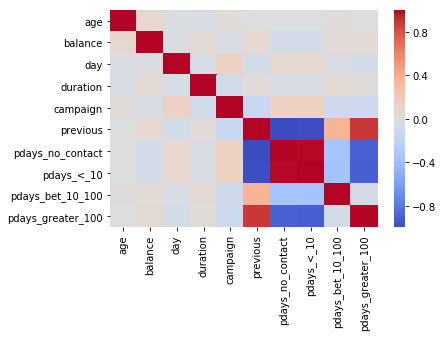

In [31]:
sns.heatmap(bank.corr(method='spearman'), annot=False, cmap='coolwarm')

In [32]:
#creating a numerical only df for feature scaling pipeline
bank_num = bank[['age','balance','day', 'duration','campaign','previous']]
bank_num.head()

,age,balance,day,duration,campaign,previous
0,30,1787,19,79,1,0
1,33,4789,11,220,1,4
2,35,1350,16,185,1,1
3,30,1476,3,199,4,0
4,59,0,5,226,1,0


<Figure size 432x288 with 0 Axes>

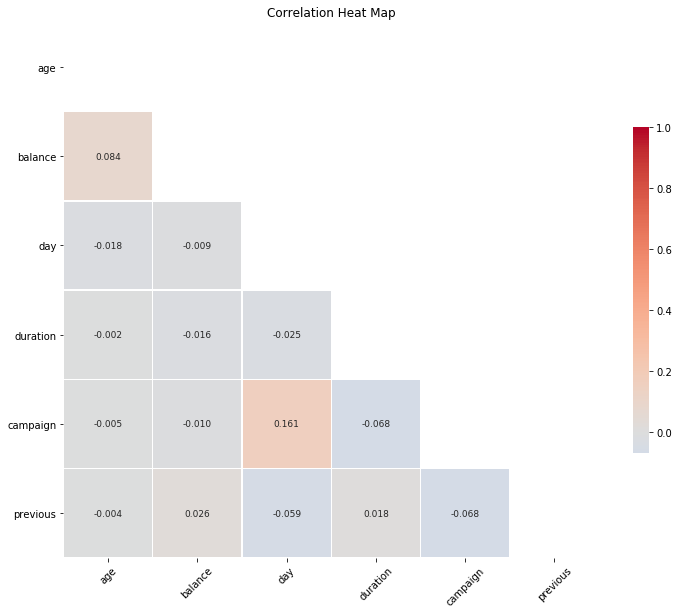

In [33]:
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25)      

np.set_printoptions(precision=3)

corr_chart(df_corr = bank_num) 

In [34]:
print(pd.crosstab(bank.job, bank.education))
print('\n-------------------------------------------------------------')
print(pd.crosstab(bank.job, bank.marital))
print('\n-------------------------------------------------------------')

education      primary  secondary  tertiary  unknown
job                                                 
admin.              17        393        51       17
blue-collar        369        524        12       41
entrepreneur        26         58        73       11
housemaid           57         28        22        5
management          39        116       787       27
retired             80        105        31       14
self-employed       15         76        88        4
services            25        363        16       13
student              2         47        19       16
technician          15        520       211       22
unemployed          26         68        32        2
unknown              7          8         8       15

-------------------------------------------------------------
marital        divorced  married  single
job                                     
admin.               69      266     143
blue-collar          79      693     174
entrepreneur         16      13

## Data Inference

* If a person is over 60 and the job is unknown, we will clasify as retired.
* We will analyze the minimum age of a person in this dataset. The reason for this is that if a person above 18 (Because we're assuming a bank can not call a person below 18) and clasified as a student, then we can infer that the person has at least completed primary education. The reason for infering this is because primary education in Portugal is compulsory. It wasnt until 2012/2013 that secondary education was compulsory, therefore we will assume primary for those unknown.
* Management and Technicians will also be assumed to have a college education or 'tertiary' education.
* Administrative and Services work will be assumed to have a secondary education.
* Housemade will be assumed to have a primary education.

In [35]:
print('The minimum age in this data set is {}yrs'.format(min(bank['age'])))

The minimum age in this data set is 19yrs


In [36]:
bank.loc[(bank['age']>60) & (bank['job']=='unknown'), 'job'] = 'retired'
bank.loc[((bank['job']=='student')|(bank['job']=='services')) & (bank['education']=='unknown'), 'education'] = 'secondary'
bank.loc[(bank['education']=='unknown') & ((bank['job']=='management') | (bank['job']=='technician')), 'education'] = 'tertiary'
bank.loc[(bank['job']=='housemaid') & (bank['education']=='unknown'), 'education'] = 'primary'
bank.loc[(bank['job']=='admin.') & (bank['education']=='unknown'), 'education'] = 'secondary'
bank.loc[(bank['job']=='blue-collar') & (bank['education']=='unknown'), 'education'] = 'primary'

print(pd.crosstab(bank.job, bank.education))
print('\n-------------------------------------------------------------')

education      primary  secondary  tertiary  unknown
job                                                 
admin.              17        410        51        0
blue-collar        410        524        12        0
entrepreneur        26         58        73       11
housemaid           62         28        22        0
management          39        116       814        0
retired             80        106        32       16
self-employed       15         76        88        4
services            25        376        16        0
student              2         63        19        0
technician          15        520       233        0
unemployed          26         68        32        2
unknown              7          7         7       13

-------------------------------------------------------------


Lets address the part of feature scaling. 

In [37]:
#profile of all customers
bank.describe()

,age,balance,day,duration,campaign,previous,pdays_no_contact,pdays_<_10,pdays_bet_10_100,pdays_greater_100
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,0.542579,0.819509,0.822606,0.026985,0.150409
std,10.576211,3009.638142,8.247667,259.856633,3.109807,1.693562,0.384638,0.382044,0.162058,0.357512
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,25.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# profile of all bank customers who responded yes
bank_yes = bank[response==1]
bank_yes.describe()

,age,balance,day,duration,campaign,previous,pdays_no_contact,pdays_<_10,pdays_bet_10_100,pdays_greater_100
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,42.491363,1571.955854,15.658349,552.742802,2.266795,1.090211,0.646833,0.650672,0.115163,0.234165
std,13.115772,2444.398956,8.235148,390.325805,2.092071,2.055368,0.478413,0.477216,0.319526,0.423883
min,19.000000,-1206.000000,1.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,171.000000,9.000000,260.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,710.000000,15.000000,442.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,50.000000,2160.000000,22.000000,755.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000
max,87.000000,26965.000000,31.000000,2769.000000,24.000000,14.000000,1.000000,1.000000,1.000000,1.000000


Duration of yes responses is noticably different


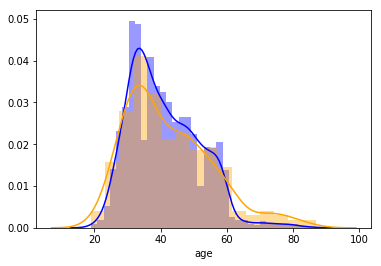

In [39]:
#compaison of overall vs those who responded yes by age, blue = all, yellow = yes
curve = sns.distplot(bank['age'], color = 'blue')
curve = sns.distplot(bank_yes['age'], color = 'orange')


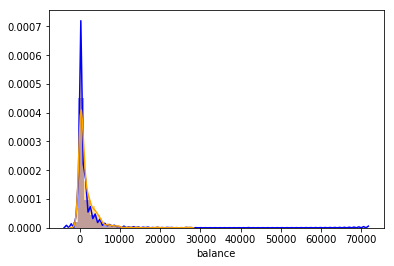

In [40]:
#compaison of overall vs those who responded yes by balance, blue = all, yellow = yes

curve = sns.distplot(bank['balance'], color = 'blue')
curve = sns.distplot(bank_yes['balance'], color = 'orange')

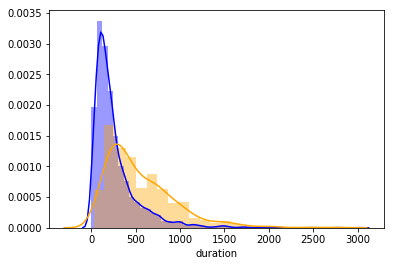

In [41]:
#compaison of overall vs those who responded yes by contact duration, blue = all, yellow = yes

curve = sns.distplot(bank['duration'], color = 'blue')
curve = sns.distplot(bank_yes['duration'], color = 'orange')

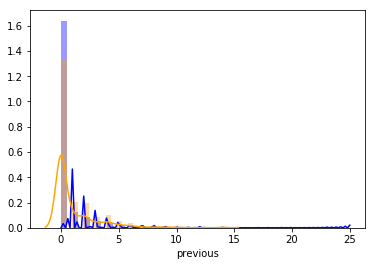

In [42]:
#compaison of overall vs those who responded yes by number of contacts before this campaign, blue = all, yellow = yes

curve = sns.distplot(bank['previous'], color = 'blue')
curve = sns.distplot(bank_yes['previous'], color = 'orange')

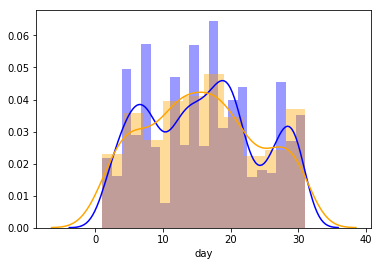

In [43]:
#compaison of overall vs those who responded yes by last contact day of the month, blue = all, yellow = yes

curve = sns.distplot(bank['day'], color = 'blue')
curve = sns.distplot(bank_yes['day'], color = 'orange')

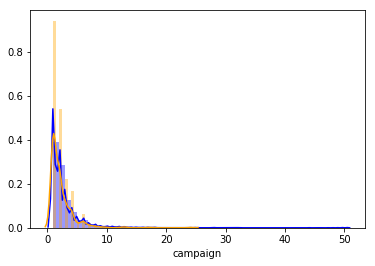

In [44]:
#compaison of overall vs those who responded yes by number of contacts during this campaign, blue = all, yellow = yes

curve = sns.distplot(bank['campaign'], color = 'blue')
curve = sns.distplot(bank_yes['campaign'], color = 'orange')

# Start model setup


In [45]:
data = pd.get_dummies(bank, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'])

data['response'].replace(('yes', 'no'), (1, 0), inplace=True)

In [46]:
data.shape

(4521, 55)

In [47]:
data.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
previous               int64
response               int64
pdays_no_contact       int64
pdays_<_10             int64
pdays_bet_10_100       int64
pdays_greater_100      int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no       

In [48]:
y = pd.DataFrame(data['response'])
X = data.drop(['response'], axis=1)
print(X.columns)
print(y.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'pdays_no_contact', 'pdays_<_10', 'pdays_bet_10_100',
       'pdays_greater_100', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')
Index(['response']

In [49]:
names = ["Logistic Regression", "Naive Bayes"]
classifiers = [LogisticRegression(solver = 'lbfgs') ,BernoulliNB()]


--------------------------------------
Logistic Regressionfold # :0


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


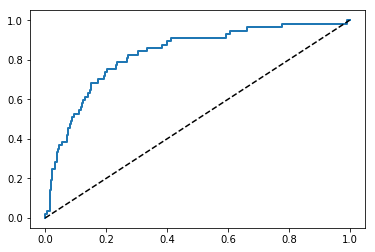

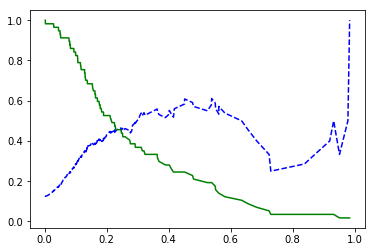

AUROC curve : 0.83143
--------------------------------------
Naive Bayesfold # :0


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


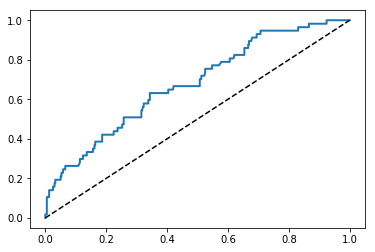

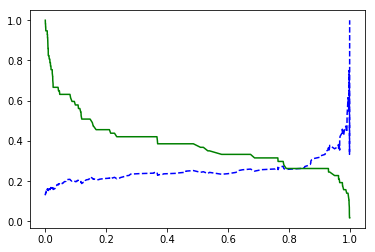

AUROC curve : 0.67841
--------------------------------------
Logistic Regressionfold # :1


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


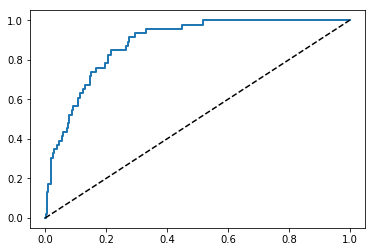

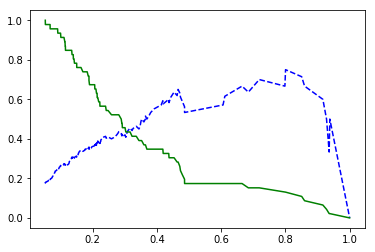

AUROC curve : 0.88509
--------------------------------------
Naive Bayesfold # :1


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


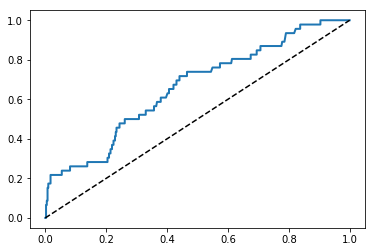

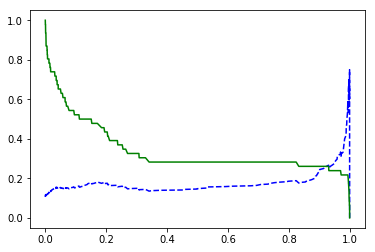

AUROC curve : 0.65975
--------------------------------------
Logistic Regressionfold # :2


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


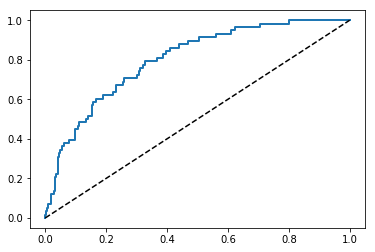

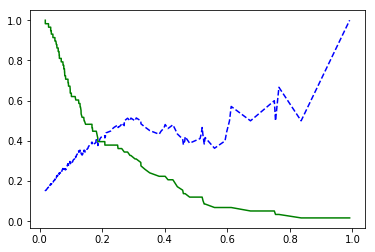

AUROC curve : 0.80041
--------------------------------------
Naive Bayesfold # :2


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


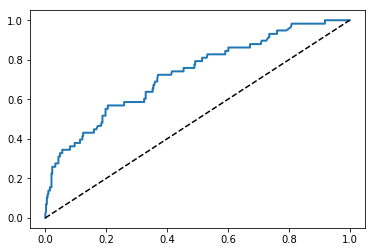

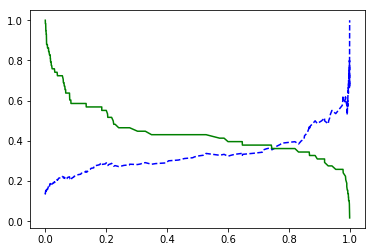

AUROC curve : 0.72924
--------------------------------------
Logistic Regressionfold # :3


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


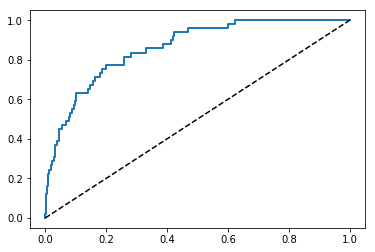

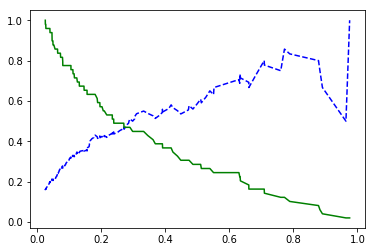

AUROC curve : 0.86119
--------------------------------------
Naive Bayesfold # :3


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


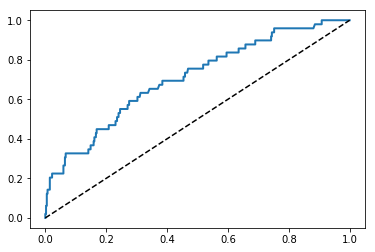

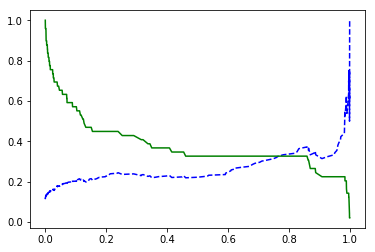

AUROC curve : 0.70654
--------------------------------------
Logistic Regressionfold # :4


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


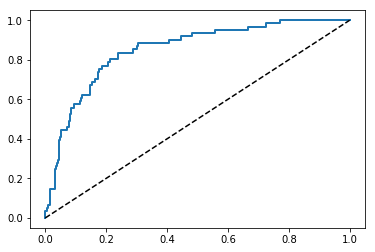

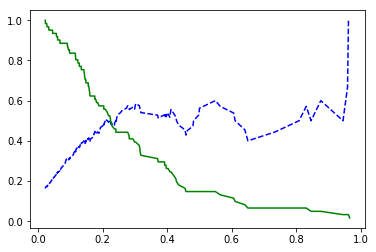

AUROC curve : 0.85036
--------------------------------------
Naive Bayesfold # :4


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


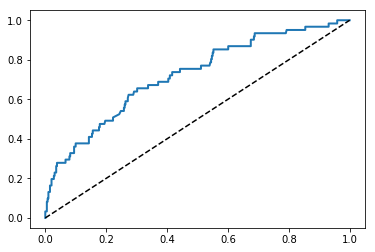

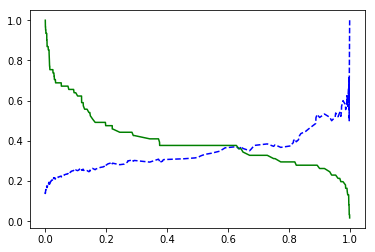

AUROC curve : 0.72041
--------------------------------------
Logistic Regressionfold # :5


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


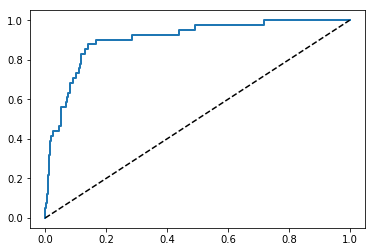

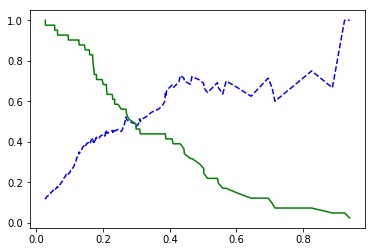

AUROC curve : 0.90659
--------------------------------------
Naive Bayesfold # :5


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


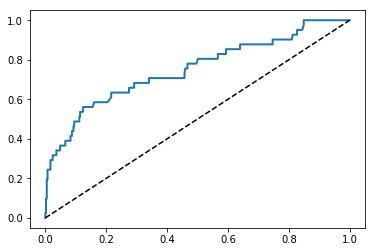

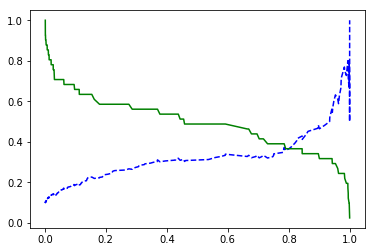

AUROC curve : 0.75085
--------------------------------------
Logistic Regressionfold # :6


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


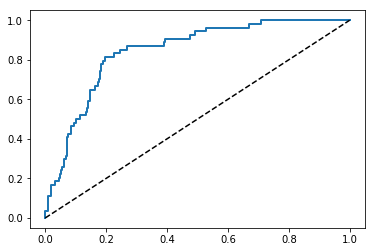

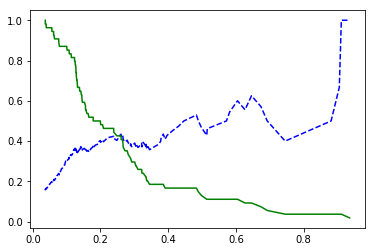

AUROC curve : 0.84362
--------------------------------------
Naive Bayesfold # :6


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


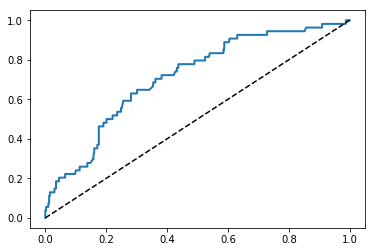

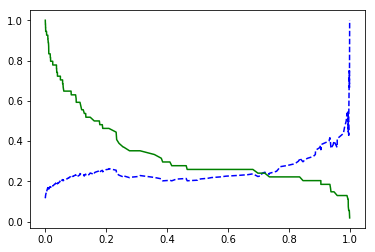

AUROC curve : 0.71231
--------------------------------------
Logistic Regressionfold # :7


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


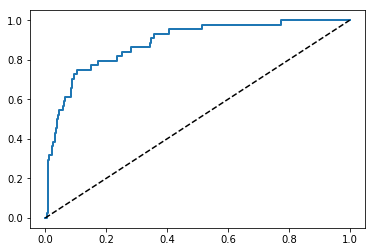

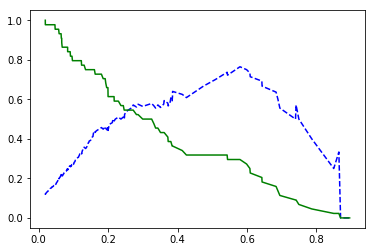

AUROC curve : 0.88570
--------------------------------------
Naive Bayesfold # :7


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


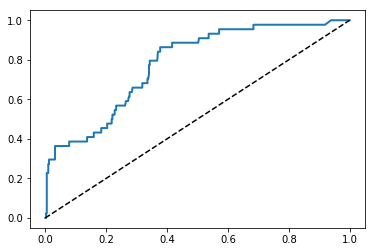

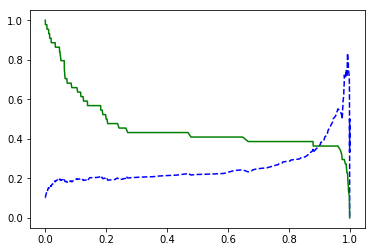

AUROC curve : 0.77933
--------------------------------------
Logistic Regressionfold # :8


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


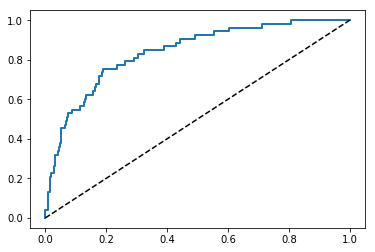

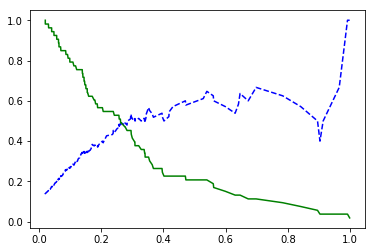

AUROC curve : 0.83851
--------------------------------------
Naive Bayesfold # :8


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


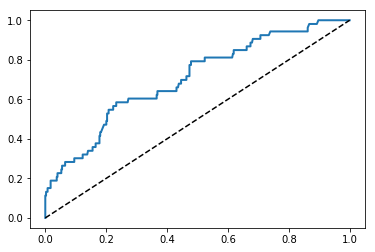

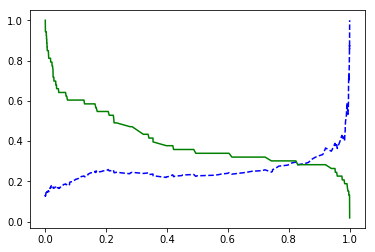

AUROC curve : 0.70414
--------------------------------------
Logistic Regressionfold # :9


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


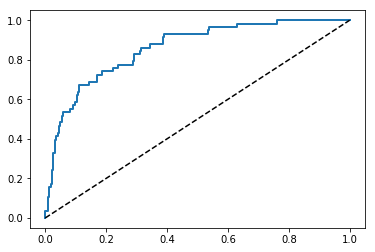

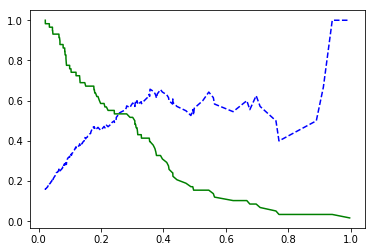

AUROC curve : 0.85826
--------------------------------------
Naive Bayesfold # :9


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


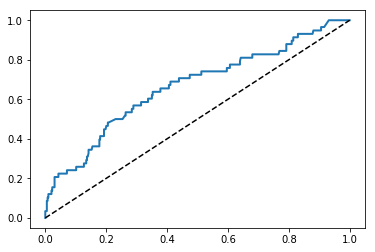

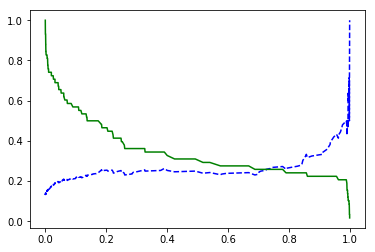

AUROC curve : 0.66484

Results From 10-Fold Cross-Validation
------                 ------------
Method                 AUROC Curve
------                 ------------
Logistic Regression    0.856117
Naive Bayes            0.710581
dtype: float64


In [50]:
folds = 10
validate_results = np.zeros((folds, len(names)))

#setting up ROC plots
from sklearn.metrics import roc_curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  # Add axis labels and grid

#only 11% of responses were positive so Precision Recall Curve may be more effective
from sklearn.metrics import precision_recall_curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    # highlight the threshold, add the legend, axis label and grid




kf = KFold(n_splits = folds, shuffle=False, random_state = RANDOM_SEED)

fold_index = 0
for train_index, test_index in kf.split(data):    
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]   
  
    method = 0
    for name, clf in zip(names, classifiers):
        #print(name,"fold # :", fold_index)        
        print('--------------------------------------')
        print("{}fold # :{}".format(name, fold_index))   
        clf.fit(X_train, y_train)    
        y_test_predict = clf.predict_proba(X_test)
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) 
        fpr, tpr, thresholds = roc_curve(y_test, y_test_predict[:,1])
        plot_roc_curve(fpr, tpr)
        plt.show()
        #y_test_pred_90 = (y_test_predict[:,1] >= thresholds[np.argmax(precisions >= 0.90)])
        #fold_method_result_precision = precision_score(y_test, y_test_pred_90)
        #fold_method_result_recall = recall_score(y_test, y_test_pred_90)        
        precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_predict[:,1])
        plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
        plt.show()

        print('AUROC curve : '+'{:.5f}'.format(fold_method_result))
        validate_results[fold_index, method] = fold_method_result
        
        method += 1
    
    fold_index += 1
  
    
validate_results_df = pd.DataFrame(validate_results)
validate_results_df.columns = names

print(bcolors.BOLD + '\nResults From ', folds, '-Fold Cross-Validation\n',
      '------                 ------------\n',
      'Method                 AUROC Curve\n',
      '------                 ------------' + bcolors.ENDC,sep = '')     
print(validate_results_df.mean())
